## Some Notes

Astropy convolution offers two convolution options, ``convolve()`` is better for small kernels, and ``convolve_fft()`` is better for larger kernels, please see the [Astropy convolution doc page](http://docs.astropy.org/en/stable/convolution/) and [Astropy Convolution How to](http://docs.astropy.org/en/stable/convolution/using.html) for more details.  For this notebook, we will use ``convolve``. Check out the list of kernels and filters avaialble for [Astropy](http://docs.astropy.org/en/stable/convolution/#module-astropy.convolution), and [Scipy](http://docs.scipy.org/doc/scipy/reference/ndimage.html)

Although ``astropy.convolution`` is built on ``scipy``, it offers several advantages:
* can handle NaN values
* improved options for boundaries
* provided built in kernels

So when possible, we will be using ``astropy.convolution`` functions in this notebook.

<h3> <mark>Important Note</mark> </h3>

You can select from the following boundary rules in ``astropy.convolution``:
* none
* fill
* wrap
* extend

You can select from the following boundary rules in ``scipy.ndimage.convolution``:
* reflect
* constant
* nearest
* mirror
* wrap

<br>
## General Imports
These imports will be used for a majority of the tasks listed below.  More specific imports can be found in the task section.

In [125]:
from astropy.io import fits
import numpy as np
from astropy.convolution import convolve as ap_convolve
from scipy.ndimage import convolve as sp_convolve

<br>
## Imports for Plotting Examples

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<br><br><br>
<center> <h2>Convolution Functions</h2> </center>

<br>
### convolve

The convolve task allows you to convolve your data array with a kernel of your own creation.  Here we show a simple example of a rectangular kernel applied to a 10 by 10 array using the ``astropy.convolution.convolve`` function

In [86]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# setup our custom kernel
my_kernel = [[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]
# perform convolution
result = ap_convolve(my_arr, my_kernel, normalize_kernel=True, boundary='wrap')

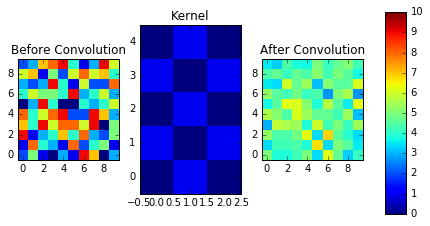

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=3)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(my_kernel,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('Kernel')
a = axes[2].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[2].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br>
### boxcar

The boxcar convolution does a boxcar smoothing with a given box size, and applies this running average to an array.  Here we show a 2-D example using ``Box2DKernel``, which is convient for square box sizes.

In [88]:
from astropy.convolution import Box2DKernel

In [89]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# setup our kernel
box_kernel = Box2DKernel(3)
# perform convolution
result = ap_convolve(my_arr, box_kernel, normalize_kernel=True)

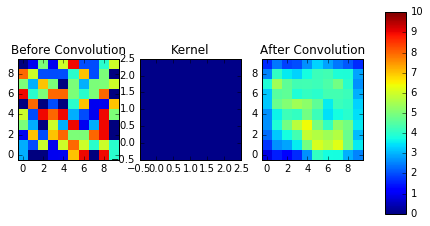

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=3)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(box_kernel,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('Kernel')
a = axes[2].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[2].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

Add example of rectangular boxcar / ask astropy why they didn't include this...

<br>
### gauss

The gaussian kernel convolution applies a gaussian function convolution to your data array.  The ``Gaussian2DKernel`` size is defined slightly differently from the IRAF version: http://docs.astropy.org/en/stable/api/astropy.convolution.Gaussian2DKernel.html#astropy.convolution.Gaussian2DKernel

In [91]:
from astropy.convolution import Gaussian2DKernel

In [92]:
# create test array
my_arr = np.random.randint(0,10,(30,30))
# setup our kernel, with 6 sigma and a 3 in x by 5 in y size
gauss_kernel = Gaussian2DKernel(6, x_size=5, y_size=7)
# perform convolution
result = ap_convolve(my_arr, gauss_kernel, normalize_kernel=True)

gauss_kernel

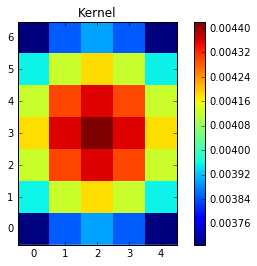

In [93]:
plt.imshow(gauss_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

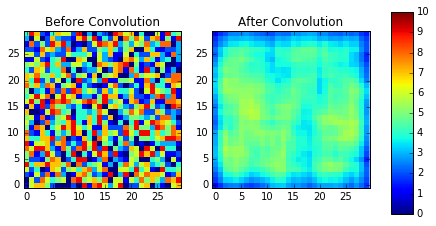

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br>
### laplace

The laplace task runs a image convolution using a laplacian filter with a subset of footprints.  For the ``scipy.ndimage.filter.laplace`` function we will be using, you can feed any footprint in as an array to create your kernel.

In [96]:
from scipy.ndimage import laplace

In [105]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# setup our laplace kernel with a target footprint (diagonals in IRAF)
footprint = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
laplace_kernel = laplace(footprint)
# perform scipy convolution
result = sp_convolve(my_arr, laplace_kernel)

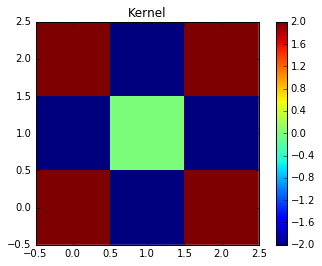

In [106]:
plt.imshow(laplace_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

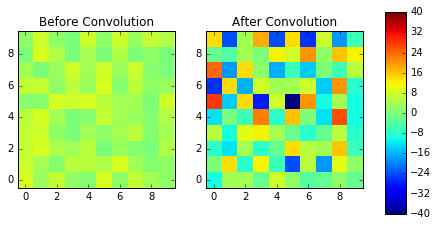

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=-40, vmax=40)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=-40, vmax=40)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br>
### gradient

In [108]:
from scipy.ndimage.filters import generic_gradient_magnitude
from scipy.misc import derivative
from scipy import exp2

In [56]:
footprint = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
out = generic_gradient_magnitude(footprint,????)

1.99999999995


TypeError: f() takes exactly 1 argument (5 given)

<br><br>
<center> <h2>Convolution Function With Masking</h2> </center>

Here is an example using masking with ``astropy.convolve``

In [136]:
# create test array
my_arr = np.random.random_sample((10,10)) * 10
my_arr[5,5] = np.nan
my_arr[2,8] = np.nan
# setup our custom kernel
my_kernel = [[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]
# perform convolution
result = ap_convolve(my_arr, my_kernel, normalize_kernel=True, boundary='wrap')

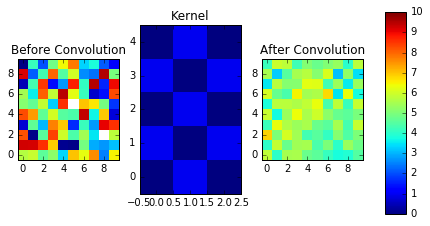

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=3)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(my_kernel,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('Kernel')
a = axes[2].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[2].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

Here is an example using masking with ``scipy.convolve``

In [146]:
# create test array
my_arr = np.random.random_sample((10,10)) * 10
my_arr[5,5] = np.nan
my_arr[2,8] = np.nan
# setup our custom kernel
my_kernel = np.array([[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]) * (1/7.0)
# perform convolution
result = sp_convolve(my_arr, my_kernel, mode='wrap')

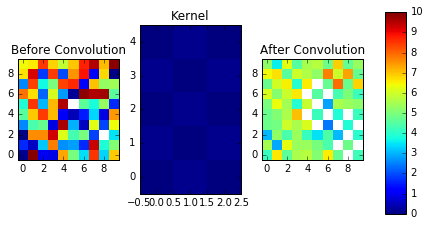

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=3)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(my_kernel,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('Kernel')
a = axes[2].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[2].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br><br>
<center> <h2>Filter Functions</h2> </center>

<br>
### median / rmedian

Apply a median filter to your data array.  We will use the ``scipy.ndimage.filters.median_filter`` function.

In [110]:
from scipy.ndimage.filters import median_filter

In [111]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# apply median filter
filtered = median_filter(my_arr,size=(3,4))

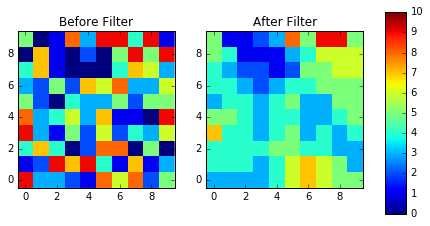

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

For a ring median filter we can supply a more specific footprint to the ``median_filter`` function.  You can easily generate this footprint using the ``astroimtools`` library

In [113]:
from astroimtools import circular_annulus_footprint

#depreciation warning, is fixed already in the dev version, not sure when this is getting pushed

In [114]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# create annulus filter
fp = circular_annulus_footprint(10, 12)
# apply median filter
filtered = median_filter(my_arr, footprint=fp)

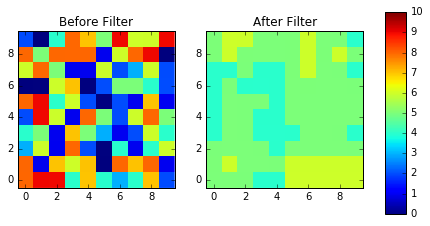

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br><br>
<center> <h2>Creating Your Own Filter Functions</h2> </center>

<br>
###  mode / rmode

The mode calculation equation used in the mode and rmode IRAF tasks (3.0\*median - 2.0\*mean) can be recreated using the ``scipy.ndimage.generic_filter`` function. ** explination for approximation**

In [116]:
from scipy.ndimage import generic_filter
from astroimtools import circular_annulus_footprint

In [117]:
def mode_func(in_arr):
    f = 3.0*np.median(in_arr) - 2.0*np.mean(in_arr)
    return f

For a box footprint:

In [118]:
# create test array
my_arr = np.random.randint(0,10,(10,10))
# apply mode filter
filtered = generic_filter(my_arr,mode_func,size=5)

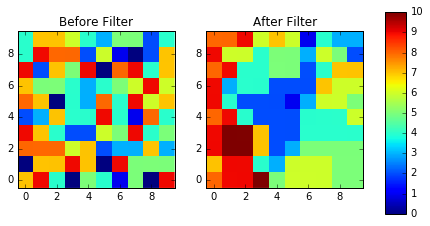

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

For a ring footprint:

In [120]:
# create test array
my_arr = np.random.randint(0,10,(20,20))
# create annulus filter
fp = circular_annulus_footprint(5, 9)
# apply mode filter
filtered = generic_filter(my_arr,mode_func,footprint=fp)

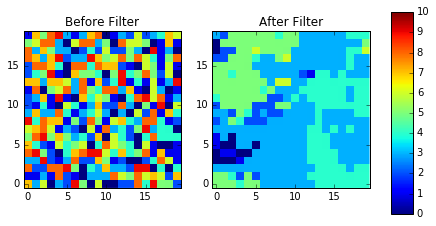

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=0, vmax=10)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
plt.show()

<br><br>
## Not Replacing

* runmed - see **images.imutil.imsum**
* fmode

### fmedian

runmed seems to be kind of complicated, should figure out if people ever use this...

### to-do
* Go over plot examples (with Larry?)
* figure out gradient usage
* figure out fmedian (is it used?)